In [3]:
import sys
import os
from glob import glob
import numpy as np
import pandas as pd
from IPython.display import display
sys.path.append(os.path.dirname('/Users/llotter/projects/juspyce/juspyce'))
from juspyce.api import JuSpyce
from juspyce.stats import *
from juspyce.utils import *
import seaborn as sns


x = glob("/Users/llotter/projects/juspyce/testing/test_x/*")
y = glob("/Users/llotter/projects/juspyce/testing/test_y/*")
parcellation = glob("/Users/llotter/projects/juspyce/testing/test_parc/*.nii.gz")[0]
parcellation_labels = glob("/Users/llotter/projects/juspyce/testing/test_parc/*.csv")[0]
parcellation_labels = pd.read_csv(parcellation_labels)["label"].to_list()
print(x)
print(y)
print(parcellation)

['/Users/llotter/projects/juspyce/testing/test_x/NMDA-ge179-29-galovic2021.nii.gz', '/Users/llotter/projects/juspyce/testing/test_x/mGluR5-abp688-73-smart2019.nii.gz', '/Users/llotter/projects/juspyce/testing/test_x/GABAa-flumazenil-6-dukart2018.nii.gz', '/Users/llotter/projects/juspyce/testing/test_x/D2-raclopride-156-malen2022.nii.gz']
['/Users/llotter/projects/juspyce/testing/test_y/dc_KKI_1_29273_29322_29303_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz', '/Users/llotter/projects/juspyce/testing/test_y/dc_KKI_1_29273_29322_29297_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz', '/Users/llotter/projects/juspyce/testing/test_y/dc_KKI_1_29273_29322_29302_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz', '/Users/llotter/projects/juspyce/testing/test_y/dc_KKI_1_29273_29322_29296_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz', '/Users/llotter/projects/juspyce/testing/test_y/dc_KKI_1_29273_29322_29298_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz',

## Initialize API

### Input: volumetric data

In [4]:
correlater = JuSpyce(
    x=x,
    y=y,
    z="gm",
    parcellation=parcellation,
    parcellation_space="MNI152",
    parcellation_labels=parcellation_labels,
    data_space="MNI152",
    standardize=True)
correlater.fit()
print(correlater.X.shape, correlater.Y.shape)
display(correlater.X)
display(correlater.Y)
display(correlater.Z)

INFO:juspyce.api:Checking input data for x (should be, e.g., PET data):
INFO:juspyce.io:Input type: list, assuming imaging data.


Parcellating imaging data:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:juspyce.api:Got 'x' data for 4 x 116 parcels.
INFO:juspyce.api:Checking input data for y (should be, e.g., subject data):
INFO:juspyce.io:Input type: list, assuming imaging data.


Parcellating imaging data:   0%|          | 0/10 [00:00<?, ?it/s]

INFO:juspyce.api:Got 'y' data for 10 x 116 parcels.
INFO:juspyce.api:Checking input data for z (should be, e.g., grey matter data):
INFO:juspyce.api:Using nilearn grey matter template as 'z' to control for GMV.
INFO:juspyce.io:Input type: list, assuming imaging data.


Parcellating imaging data:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:juspyce.api:Got 'z' data for 1 x 116 parcels.
INFO:juspyce.api:Z-standardizing 'X' data.
INFO:juspyce.api:Z-standardizing 'Y' data.
INFO:juspyce.api:Z-standardizing 'Z' data.


(4, 116) (10, 116)


,LH_Vis_1,LH_Vis_2,LH_Vis_3,LH_Vis_4,LH_Vis_5,LH_Vis_6,LH_Vis_7,LH_Vis_8,LH_Vis_9,LH_SomMot_1,...,PUT-rh,CAU-rh,HIP-lh,AMY-lh,pTHA-lh,aTHA-lh,NAc-lh,GP-lh,PUT-lh,CAU-lh
NMDA-ge179-29-galovic2021.nii.gz,-0.604139,0.479128,0.824288,-2.400196,-0.369306,0.695162,-0.704262,-1.197998,0.033064,0.199373,...,2.214797,1.118776,1.701153,-0.047470,2.937759,2.466494,1.534873,1.358545,2.503006,1.408803
mGluR5-abp688-73-smart2019.nii.gz,-0.571617,-1.216179,-0.616633,-2.584671,-1.578982,-0.101176,0.129240,-0.981888,0.072335,0.738736,...,0.397593,-0.165991,-0.781848,-1.092088,-1.722626,-2.301382,1.202235,-3.299477,0.203655,-0.209401
GABAa-flumazenil-6-dukart2018.nii.gz,0.608314,1.187471,1.537523,-1.190966,0.859511,1.948552,0.162192,-0.318239,0.649863,0.309375,...,-2.013616,-2.963909,-0.315344,-0.715506,-2.387317,-2.490360,-1.071715,-2.617411,-1.828160,-2.884014
D2-raclopride-156-malen2022.nii.gz,-0.267509,-0.181701,-0.242144,-0.590686,-0.247245,-0.255069,-0.284163,-0.387137,-0.176834,-0.227523,...,4.577519,3.674336,-0.167294,0.029536,0.096265,0.157489,3.628440,2.128651,4.752494,3.212779


,LH_Vis_1,LH_Vis_2,LH_Vis_3,LH_Vis_4,LH_Vis_5,LH_Vis_6,LH_Vis_7,LH_Vis_8,LH_Vis_9,LH_SomMot_1,...,PUT-rh,CAU-rh,HIP-lh,AMY-lh,pTHA-lh,aTHA-lh,NAc-lh,GP-lh,PUT-lh,CAU-lh
dc_KKI_1_29273_29322_29303_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.695429,1.636432,3.228759,-0.876199,1.392852,1.760841,0.414584,0.069471,1.777899,0.674681,...,0.028261,0.434097,1.485563,1.534493,-1.502668,-0.013011,0.874033,1.534806,-0.111298,-1.211678
dc_KKI_1_29273_29322_29297_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.190952,1.451043,2.560534,0.262121,1.983468,2.671703,0.583331,2.780527,2.549980,-0.558373,...,-0.847899,-1.081750,-1.012500,-0.924662,-0.565543,-1.119284,-1.332106,-0.825417,-0.440689,-0.914394
dc_KKI_1_29273_29322_29302_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.913129,-0.697478,-0.315159,-0.285847,-1.156263,1.066339,0.157600,-1.271947,-0.845419,0.213733,...,1.812409,1.210803,-0.273153,-0.957777,-1.699209,-1.000071,-0.509723,0.629836,1.549690,0.248246
dc_KKI_1_29273_29322_29296_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.099462,1.481160,2.257387,-0.980932,-0.379843,1.445908,0.124351,0.547703,1.394822,0.483825,...,0.395636,0.286493,-0.848077,-1.039292,-0.654923,-0.907662,-0.996102,0.122920,-0.188517,-0.766601
dc_KKI_1_29273_29322_29298_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,1.153598,2.708495,2.627456,0.030688,1.366009,2.163601,-0.137428,1.059916,2.079171,-1.393748,...,-1.309804,-1.106798,-0.704189,-1.283381,-0.041917,-0.871857,-1.595103,-1.066419,-1.048524,-1.212798
dc_KKI_1_29273_29322_29301_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.094598,0.040693,2.695490,-1.340964,0.429407,1.791831,0.551066,1.791000,1.539030,0.814031,...,-0.444522,-1.481857,-1.721427,-1.213253,-1.584728,-1.674052,-1.288756,-1.057436,-0.322065,-1.126016
dc_KKI_1_29273_29322_29295_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.590676,-0.307040,0.537251,-1.119070,-1.597104,0.288227,-0.314008,-0.635297,-0.100102,0.148527,...,2.331596,0.929394,0.124678,0.556415,1.057009,-1.101319,1.289805,0.326932,1.954299,0.729972
dc_KKI_1_29273_29322_29300_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.697052,-0.441495,-0.387932,-1.574508,-0.590827,0.183747,0.986273,-1.857770,-0.510280,1.095293,...,0.816294,1.185325,-1.898592,-2.048506,-1.223449,0.647557,-0.747607,1.364022,0.699597,0.849590
dc_KKI_1_29273_29322_29299_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.726496,2.452711,1.697162,1.414542,1.115021,1.484175,0.581136,1.012801,1.817906,0.466116,...,-0.626376,0.041860,-0.957873,-1.305455,-1.023513,-0.507488,-1.246955,-1.009407,-0.366883,0.860632
dc_KKI_1_29273_29322_29294_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,1.464380,0.144229,-0.258239,0.766865,1.131932,0.910182,-0.044887,0.202290,0.936081,-1.007187,...,0.150342,-0.228109,0.579613,-0.337225,-0.467117,-0.351607,2.431560,0.348821,-0.113911,0.392424


,LH_Vis_1,LH_Vis_2,LH_Vis_3,LH_Vis_4,LH_Vis_5,LH_Vis_6,LH_Vis_7,LH_Vis_8,LH_Vis_9,LH_SomMot_1,...,PUT-rh,CAU-rh,HIP-lh,AMY-lh,pTHA-lh,aTHA-lh,NAc-lh,GP-lh,PUT-lh,CAU-lh
gm,0.921333,0.17635,0.69756,-1.638617,-0.881545,0.259693,-0.339806,-1.042037,-0.933184,-0.885051,...,-0.07563,1.104423,1.833296,2.346207,0.271518,0.381888,2.348057,-3.565602,-0.349897,1.576679


### Save and reload

In [5]:
correlater.to_pickle("/Users/llotter/projects/juspyce/testing/test_dump.pkl.gz") 
correlater_dumped = JuSpyce.from_pickle("/Users/llotter/projects/juspyce/testing/test_dump.pkl.gz")

INFO:juspyce.api:Saved complete gzip compressed object to /Users/llotter/projects/juspyce/testing/test_dump.pkl.gz.
INFO:juspyce.api:Loaded complete object from /Users/llotter/projects/juspyce/testing/test_dump.pkl.gz.


### Introduce NAs to the data

In [6]:
if False:
    correlater.X.iloc[0,5] = np.nan
    correlater.X.iloc[0,1] = np.nan
    correlater.Y.iloc[0,5] = np.nan
    correlater.Z.iloc[0,5] = np.nan

    correlater = CMC(x=correlater.X,
                    y=correlater.Y,
                    z=correlater.Z,
                    parcellation=correlater.parc,
                    parcellation_space=correlater.parc_space,
                    parcellation_labels=correlater.parc_lab,
                    data_space=correlater.data_space,
                    standardize=correlater.zscore,
                    drop_nan=False).fit()

### Input: numpy array

In [8]:
x = correlater.X.iloc[0,:].values
y = correlater.Y.values
correlater2 = JuSpyce(x=x, y=y)
correlater2.fit()
print(correlater2.X.shape, correlater2.Y.shape)
display(correlater2.X)
display(correlater2.Y)

INFO:juspyce.api:Checking input data for x (should be, e.g., PET data):
INFO:juspyce.io:Input type: ndarray, assuming parcellated data with shape (n_files/subjects/etc, n_parcels).
INFO:juspyce.api:Got 'x' data for 1 x 116 parcels.
INFO:juspyce.api:Checking input data for y (should be, e.g., subject data):
INFO:juspyce.io:Input type: ndarray, assuming parcellated data with shape (n_files/subjects/etc, n_parcels).
INFO:juspyce.api:Got 'y' data for 10 x 116 parcels.
INFO:juspyce.api:Z-standardizing 'X' data.
INFO:juspyce.api:Z-standardizing 'Y' data.


(1, 116) (10, 116)


,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,-0.604139,0.479128,0.824288,-2.400196,-0.369306,0.695162,-0.704262,-1.197998,0.033064,0.199373,...,2.214797,1.118776,1.701153,-0.04747,2.937759,2.466494,1.534873,1.358545,2.503006,1.408803


,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,0.695429,1.636432,3.228759,-0.876199,1.392852,1.760841,0.414584,0.069471,1.777899,0.674681,...,0.028261,0.434097,1.485563,1.534493,-1.502668,-0.013011,0.874033,1.534806,-0.111298,-1.211678
1,-0.190952,1.451043,2.560534,0.262121,1.983468,2.671703,0.583331,2.780527,2.549980,-0.558373,...,-0.847899,-1.081750,-1.012500,-0.924662,-0.565543,-1.119284,-1.332106,-0.825417,-0.440689,-0.914394
2,-0.913129,-0.697478,-0.315159,-0.285847,-1.156263,1.066339,0.157600,-1.271947,-0.845419,0.213733,...,1.812409,1.210803,-0.273153,-0.957777,-1.699209,-1.000071,-0.509723,0.629836,1.549690,0.248246
3,0.099462,1.481160,2.257387,-0.980932,-0.379843,1.445908,0.124351,0.547703,1.394822,0.483825,...,0.395636,0.286493,-0.848077,-1.039292,-0.654923,-0.907662,-0.996102,0.122920,-0.188517,-0.766601
4,1.153598,2.708495,2.627456,0.030688,1.366009,2.163601,-0.137428,1.059916,2.079171,-1.393748,...,-1.309804,-1.106798,-0.704189,-1.283381,-0.041917,-0.871857,-1.595103,-1.066419,-1.048524,-1.212798
5,-0.094598,0.040693,2.695490,-1.340964,0.429407,1.791831,0.551066,1.791000,1.539030,0.814031,...,-0.444522,-1.481857,-1.721427,-1.213253,-1.584728,-1.674052,-1.288756,-1.057436,-0.322065,-1.126016
6,-0.590676,-0.307040,0.537251,-1.119070,-1.597104,0.288227,-0.314008,-0.635297,-0.100102,0.148527,...,2.331596,0.929394,0.124678,0.556415,1.057009,-1.101319,1.289805,0.326932,1.954299,0.729972
7,0.697052,-0.441495,-0.387932,-1.574508,-0.590827,0.183747,0.986273,-1.857770,-0.510280,1.095293,...,0.816294,1.185325,-1.898592,-2.048506,-1.223449,0.647557,-0.747607,1.364022,0.699597,0.849590
8,0.726496,2.452711,1.697162,1.414542,1.115021,1.484175,0.581136,1.012801,1.817906,0.466116,...,-0.626376,0.041860,-0.957873,-1.305455,-1.023513,-0.507488,-1.246955,-1.009407,-0.366883,0.860632
9,1.464380,0.144229,-0.258239,0.766865,1.131932,0.910182,-0.044887,0.202290,0.936081,-1.007187,...,0.150342,-0.228109,0.579613,-0.337225,-0.467117,-0.351607,2.431560,0.348821,-0.113911,0.392424


### Input: pandas df/series

In [10]:
x = correlater.X.iloc[0,:]
y = correlater.Y
correlater3 = JuSpyce(x=x, y=y, standardize=True)
correlater3.fit()
print(correlater3.X.shape, correlater3.Y.shape)
display(correlater3.X)
display(correlater3.Y)

INFO:juspyce.api:Checking input data for x (should be, e.g., PET data):
INFO:juspyce.io:Input type: Series, assuming parcellated data with shape (1, n_parcels).
INFO:juspyce.api:Got 'x' data for 1 x 116 parcels.
INFO:juspyce.api:Checking input data for y (should be, e.g., subject data):
INFO:juspyce.io:Input type: DataFrame, assuming parcellated data with shape (n_files/subjects/etc, n_parcels).
INFO:juspyce.api:Got 'y' data for 10 x 116 parcels.
INFO:juspyce.api:Z-standardizing 'X' data.
INFO:juspyce.api:Z-standardizing 'Y' data.


(1, 116) (10, 116)


,LH_Vis_1,LH_Vis_2,LH_Vis_3,LH_Vis_4,LH_Vis_5,LH_Vis_6,LH_Vis_7,LH_Vis_8,LH_Vis_9,LH_SomMot_1,...,PUT-rh,CAU-rh,HIP-lh,AMY-lh,pTHA-lh,aTHA-lh,NAc-lh,GP-lh,PUT-lh,CAU-lh
NMDA-ge179-29-galovic2021.nii.gz,-0.604139,0.479128,0.824288,-2.400196,-0.369306,0.695162,-0.704262,-1.197998,0.033064,0.199373,...,2.214797,1.118776,1.701153,-0.04747,2.937759,2.466494,1.534873,1.358545,2.503006,1.408803


,LH_Vis_1,LH_Vis_2,LH_Vis_3,LH_Vis_4,LH_Vis_5,LH_Vis_6,LH_Vis_7,LH_Vis_8,LH_Vis_9,LH_SomMot_1,...,PUT-rh,CAU-rh,HIP-lh,AMY-lh,pTHA-lh,aTHA-lh,NAc-lh,GP-lh,PUT-lh,CAU-lh
dc_KKI_1_29273_29322_29303_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.695429,1.636432,3.228759,-0.876199,1.392852,1.760841,0.414584,0.069471,1.777899,0.674681,...,0.028261,0.434097,1.485563,1.534493,-1.502668,-0.013011,0.874033,1.534806,-0.111298,-1.211678
dc_KKI_1_29273_29322_29297_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.190952,1.451043,2.560534,0.262121,1.983468,2.671703,0.583331,2.780527,2.549980,-0.558373,...,-0.847899,-1.081750,-1.012500,-0.924662,-0.565543,-1.119284,-1.332106,-0.825417,-0.440689,-0.914394
dc_KKI_1_29273_29322_29302_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.913129,-0.697478,-0.315159,-0.285847,-1.156263,1.066339,0.157600,-1.271947,-0.845419,0.213733,...,1.812409,1.210803,-0.273153,-0.957777,-1.699209,-1.000071,-0.509723,0.629836,1.549690,0.248246
dc_KKI_1_29273_29322_29296_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.099462,1.481160,2.257387,-0.980932,-0.379843,1.445908,0.124351,0.547703,1.394822,0.483825,...,0.395636,0.286493,-0.848077,-1.039292,-0.654923,-0.907662,-0.996102,0.122920,-0.188517,-0.766601
dc_KKI_1_29273_29322_29298_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,1.153598,2.708495,2.627456,0.030688,1.366009,2.163601,-0.137428,1.059916,2.079171,-1.393748,...,-1.309804,-1.106798,-0.704189,-1.283381,-0.041917,-0.871857,-1.595103,-1.066419,-1.048524,-1.212798
dc_KKI_1_29273_29322_29301_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.094598,0.040693,2.695490,-1.340964,0.429407,1.791831,0.551066,1.791000,1.539030,0.814031,...,-0.444522,-1.481857,-1.721427,-1.213253,-1.584728,-1.674052,-1.288756,-1.057436,-0.322065,-1.126016
dc_KKI_1_29273_29322_29295_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.590676,-0.307040,0.537251,-1.119070,-1.597104,0.288227,-0.314008,-0.635297,-0.100102,0.148527,...,2.331596,0.929394,0.124678,0.556415,1.057009,-1.101319,1.289805,0.326932,1.954299,0.729972
dc_KKI_1_29273_29322_29300_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.697052,-0.441495,-0.387932,-1.574508,-0.590827,0.183747,0.986273,-1.857770,-0.510280,1.095293,...,0.816294,1.185325,-1.898592,-2.048506,-1.223449,0.647557,-0.747607,1.364022,0.699597,0.849590
dc_KKI_1_29273_29322_29299_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.726496,2.452711,1.697162,1.414542,1.115021,1.484175,0.581136,1.012801,1.817906,0.466116,...,-0.626376,0.041860,-0.957873,-1.305455,-1.023513,-0.507488,-1.246955,-1.009407,-0.366883,0.860632
dc_KKI_1_29273_29322_29294_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,1.464380,0.144229,-0.258239,0.766865,1.131932,0.910182,-0.044887,0.202290,0.936081,-1.007187,...,0.150342,-0.228109,0.579613,-0.337225,-0.467117,-0.351607,2.431560,0.348821,-0.113911,0.392424


## Transform

### partial

In [11]:
print("transform")
display(correlater.transform("partial", "X", store=False))

print("check")
check_res = np.zeros(correlater.X.shape)
for x in range(correlater.X.shape[0]):
    check_res[x,:] = check_residuals(y=correlater.X.iloc[x,:].values.T, x=correlater.Z.values.T)
display(pd.DataFrame(check_res))

INFO:juspyce.api:Regressing 'Z' from 'X': new X = residuals.


transform


  0%|          | 0/4 [00:00<?, ?it/s]

,LH_Vis_1,LH_Vis_2,LH_Vis_3,LH_Vis_4,LH_Vis_5,LH_Vis_6,LH_Vis_7,LH_Vis_8,LH_Vis_9,LH_SomMot_1,...,PUT-rh,CAU-rh,HIP-lh,AMY-lh,pTHA-lh,aTHA-lh,NAc-lh,GP-lh,PUT-lh,CAU-lh
NMDA-ge179-29-galovic2021.nii.gz,-0.962421,0.410550,0.553025,-1.762981,-0.026496,0.594174,-0.572120,-0.792777,0.395955,0.543546,...,2.244207,0.689294,0.988232,-0.959849,2.832172,2.317987,0.621775,2.745115,2.639071,0.795674
mGluR5-abp688-73-smart2019.nii.gz,-0.912333,-1.281395,-0.874596,-1.978698,-1.252980,-0.197213,0.254903,-0.596535,0.417433,1.066034,...,0.425561,-0.574416,-1.459815,-1.959733,-1.823035,-2.442608,0.333906,-1.980890,0.333049,-0.792469
GABAa-flumazenil-6-dukart2018.nii.gz,0.368881,1.141642,1.356243,-0.765128,1.088603,1.881064,0.250500,-0.047438,0.892375,0.539379,...,-1.993962,-3.250922,-0.791774,-1.325229,-2.457878,-2.589603,-1.681919,-1.690795,-1.737230,-3.293755
D2-raclopride-156-malen2022.nii.gz,-0.392841,-0.205691,-0.337036,-0.367779,-0.127326,-0.290396,-0.237938,-0.245386,-0.049890,-0.107126,...,4.587807,3.524098,-0.416684,-0.289626,0.059330,0.105539,3.309025,2.613692,4.800092,2.998298


check


,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,-0.962421,0.410550,0.553025,-1.762981,-0.026496,0.594174,-0.572120,-0.792777,0.395955,0.543546,...,2.244207,0.689294,0.988232,-0.959849,2.832172,2.317987,0.621775,2.745115,2.639071,0.795674
1,-0.912333,-1.281395,-0.874596,-1.978698,-1.252980,-0.197213,0.254903,-0.596535,0.417433,1.066034,...,0.425561,-0.574416,-1.459815,-1.959733,-1.823035,-2.442608,0.333906,-1.980890,0.333049,-0.792469
2,0.368881,1.141642,1.356243,-0.765128,1.088603,1.881064,0.250500,-0.047438,0.892375,0.539379,...,-1.993962,-3.250922,-0.791774,-1.325229,-2.457878,-2.589603,-1.681919,-1.690795,-1.737230,-3.293755
3,-0.392841,-0.205691,-0.337036,-0.367779,-0.127326,-0.290396,-0.237938,-0.245386,-0.049890,-0.107126,...,4.587807,3.524098,-0.416684,-0.289626,0.059330,0.105539,3.309025,2.613692,4.800092,2.998298


### grouped

In [12]:
print("transform")
display(correlater.Y)
groups = [0,0,0,1,1,0,0,0,1,0]
correlater.transform("cohen(A,B)", "Y", groups, store=False)

transform


,LH_Vis_1,LH_Vis_2,LH_Vis_3,LH_Vis_4,LH_Vis_5,LH_Vis_6,LH_Vis_7,LH_Vis_8,LH_Vis_9,LH_SomMot_1,...,PUT-rh,CAU-rh,HIP-lh,AMY-lh,pTHA-lh,aTHA-lh,NAc-lh,GP-lh,PUT-lh,CAU-lh
dc_KKI_1_29273_29322_29303_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.695429,1.636432,3.228759,-0.876199,1.392852,1.760841,0.414584,0.069471,1.777899,0.674681,...,0.028261,0.434097,1.485563,1.534493,-1.502668,-0.013011,0.874033,1.534806,-0.111298,-1.211678
dc_KKI_1_29273_29322_29297_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.190952,1.451043,2.560534,0.262121,1.983468,2.671703,0.583331,2.780527,2.549980,-0.558373,...,-0.847899,-1.081750,-1.012500,-0.924662,-0.565543,-1.119284,-1.332106,-0.825417,-0.440689,-0.914394
dc_KKI_1_29273_29322_29302_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.913129,-0.697478,-0.315159,-0.285847,-1.156263,1.066339,0.157600,-1.271947,-0.845419,0.213733,...,1.812409,1.210803,-0.273153,-0.957777,-1.699209,-1.000071,-0.509723,0.629836,1.549690,0.248246
dc_KKI_1_29273_29322_29296_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.099462,1.481160,2.257387,-0.980932,-0.379843,1.445908,0.124351,0.547703,1.394822,0.483825,...,0.395636,0.286493,-0.848077,-1.039292,-0.654923,-0.907662,-0.996102,0.122920,-0.188517,-0.766601
dc_KKI_1_29273_29322_29298_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,1.153598,2.708495,2.627456,0.030688,1.366009,2.163601,-0.137428,1.059916,2.079171,-1.393748,...,-1.309804,-1.106798,-0.704189,-1.283381,-0.041917,-0.871857,-1.595103,-1.066419,-1.048524,-1.212798
dc_KKI_1_29273_29322_29301_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.094598,0.040693,2.695490,-1.340964,0.429407,1.791831,0.551066,1.791000,1.539030,0.814031,...,-0.444522,-1.481857,-1.721427,-1.213253,-1.584728,-1.674052,-1.288756,-1.057436,-0.322065,-1.126016
dc_KKI_1_29273_29322_29295_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.590676,-0.307040,0.537251,-1.119070,-1.597104,0.288227,-0.314008,-0.635297,-0.100102,0.148527,...,2.331596,0.929394,0.124678,0.556415,1.057009,-1.101319,1.289805,0.326932,1.954299,0.729972
dc_KKI_1_29273_29322_29300_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.697052,-0.441495,-0.387932,-1.574508,-0.590827,0.183747,0.986273,-1.857770,-0.510280,1.095293,...,0.816294,1.185325,-1.898592,-2.048506,-1.223449,0.647557,-0.747607,1.364022,0.699597,0.849590
dc_KKI_1_29273_29322_29299_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.726496,2.452711,1.697162,1.414542,1.115021,1.484175,0.581136,1.012801,1.817906,0.466116,...,-0.626376,0.041860,-0.957873,-1.305455,-1.023513,-0.507488,-1.246955,-1.009407,-0.366883,0.860632
dc_KKI_1_29273_29322_29294_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,1.464380,0.144229,-0.258239,0.766865,1.131932,0.910182,-0.044887,0.202290,0.936081,-1.007187,...,0.150342,-0.228109,0.579613,-0.337225,-0.467117,-0.351607,2.431560,0.348821,-0.113911,0.392424


INFO:juspyce.api:Calculating parcel-wise effect size between A and B (cohen, paired: False).


  0%|          | 0/116 [00:00<?, ?it/s]

,LH_Vis_1,LH_Vis_2,LH_Vis_3,LH_Vis_4,LH_Vis_5,LH_Vis_6,LH_Vis_7,LH_Vis_8,LH_Vis_9,LH_SomMot_1,...,PUT-rh,CAU-rh,HIP-lh,AMY-lh,pTHA-lh,aTHA-lh,NAc-lh,GP-lh,PUT-lh,CAU-lh
"cohen(A,B)",-0.659017,-2.266049,-0.73694,-0.777503,-0.370922,-0.574085,0.344352,-0.501684,-0.892396,0.406538,...,0.966017,0.390161,0.418342,0.698453,-0.320394,0.148801,1.096666,1.068085,1.150825,0.236527


### dimensionality reduction

In [13]:
print("transform")
display(correlater.X)
correlater.transform("fa", "X", n_components=2, min_ev=0.9, store=False)
#display(correlater.X)
#display(correlater.dim_red["ev"])
#display(correlater.dim_red["loadings"])

transform


,LH_Vis_1,LH_Vis_2,LH_Vis_3,LH_Vis_4,LH_Vis_5,LH_Vis_6,LH_Vis_7,LH_Vis_8,LH_Vis_9,LH_SomMot_1,...,PUT-rh,CAU-rh,HIP-lh,AMY-lh,pTHA-lh,aTHA-lh,NAc-lh,GP-lh,PUT-lh,CAU-lh
NMDA-ge179-29-galovic2021.nii.gz,-0.604139,0.479128,0.824288,-2.400196,-0.369306,0.695162,-0.704262,-1.197998,0.033064,0.199373,...,2.214797,1.118776,1.701153,-0.047470,2.937759,2.466494,1.534873,1.358545,2.503006,1.408803
mGluR5-abp688-73-smart2019.nii.gz,-0.571617,-1.216179,-0.616633,-2.584671,-1.578982,-0.101176,0.129240,-0.981888,0.072335,0.738736,...,0.397593,-0.165991,-0.781848,-1.092088,-1.722626,-2.301382,1.202235,-3.299477,0.203655,-0.209401
GABAa-flumazenil-6-dukart2018.nii.gz,0.608314,1.187471,1.537523,-1.190966,0.859511,1.948552,0.162192,-0.318239,0.649863,0.309375,...,-2.013616,-2.963909,-0.315344,-0.715506,-2.387317,-2.490360,-1.071715,-2.617411,-1.828160,-2.884014
D2-raclopride-156-malen2022.nii.gz,-0.267509,-0.181701,-0.242144,-0.590686,-0.247245,-0.255069,-0.284163,-0.387137,-0.176834,-0.227523,...,4.577519,3.674336,-0.167294,0.029536,0.096265,0.157489,3.628440,2.128651,4.752494,3.212779


INFO:juspyce.api:Calculating fa on 'X' data.
INFO:juspyce.stats:Performing dimensionality reduction using fa (max components: 4, min EV: 0.9).
INFO:juspyce.stats:Returning 3 factor(s).


,LH_Vis_1,LH_Vis_2,LH_Vis_3,LH_Vis_4,LH_Vis_5,LH_Vis_6,LH_Vis_7,LH_Vis_8,LH_Vis_9,LH_SomMot_1,...,PUT-rh,CAU-rh,HIP-lh,AMY-lh,pTHA-lh,aTHA-lh,NAc-lh,GP-lh,PUT-lh,CAU-lh
c0,0.514475,0.918293,1.137214,-0.347213,0.736512,1.347612,0.202253,0.020088,0.480469,0.266396,...,-3.561404,-3.667501,0.046121,-0.371132,-1.203985,-1.283611,-2.582290,-2.403684,-3.514953,-3.354349
c1,0.084717,0.171039,0.614251,-2.001051,-0.180942,1.108591,0.084411,-0.722367,0.387873,0.414155,...,0.603965,-0.580935,-0.706719,-0.925122,-2.444870,-2.707527,1.216904,-2.336402,0.701373,-0.753935
c2,-0.179577,0.469655,0.604767,-1.439839,0.060882,0.642659,-0.411160,-0.725600,0.070569,-0.063378,...,3.592947,2.283501,0.396102,-0.137904,0.437804,0.335755,2.874481,1.503788,3.893237,2.054722


## Prediction

### Pearson

In [31]:
print("prediction")
correlater.predict(method="pearson", r_to_z=False)
display(correlater.predictions["pearson"])

print("check")
check_res = np.zeros((correlater.Y.shape[0], correlater.X.shape[0]))
for y in range(correlater.Y.shape[0]):
    for x in range(correlater.X.shape[0]):
        check_res[y,x] = check_pearson(x=correlater.X.iloc[x,:].values,
                                       y=correlater.Y.iloc[y,:].values)
display(pd.DataFrame(check_res))

prediction


Calculating predictions (pearson):   0%|          | 0/10 [00:00<?, ?it/s]

,NMDA-ge179-29-galovic2021.nii.gz,mGluR5-abp688-73-smart2019.nii.gz,GABAa-flumazenil-6-dukart2018.nii.gz,D2-raclopride-156-malen2022.nii.gz
dc_KKI_1_29273_29322_29303_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.188908,-0.080280,0.294647,0.046008
dc_KKI_1_29273_29322_29297_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.230958,-0.038909,0.411639,-0.252605
dc_KKI_1_29273_29322_29302_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.026663,0.137828,-0.038263,0.192352
dc_KKI_1_29273_29322_29296_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.131069,-0.129431,0.103887,-0.102171
dc_KKI_1_29273_29322_29298_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.098864,-0.084346,0.473969,-0.323223
dc_KKI_1_29273_29322_29301_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.202601,0.391588,0.557654,-0.260421
dc_KKI_1_29273_29322_29295_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.461809,0.376448,0.103636,0.377965
dc_KKI_1_29273_29322_29300_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.166295,0.359191,0.174732,0.164527
dc_KKI_1_29273_29322_29299_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.198195,-0.066160,0.311115,-0.137520
dc_KKI_1_29273_29322_29294_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.099466,-0.100650,0.148090,0.130794


check


,0,1,2,3
0,0.188908,-0.080280,0.294647,0.046008
1,-0.230958,-0.038909,0.411639,-0.252605
2,-0.026663,0.137828,-0.038263,0.192352
3,-0.131069,-0.129431,0.103887,-0.102171
4,-0.098864,-0.084346,0.473969,-0.323223
5,-0.202601,0.391588,0.557654,-0.260421
6,0.461809,0.376448,0.103636,0.377965
7,0.166295,0.359191,0.174732,0.164527
8,-0.198195,-0.066160,0.311115,-0.137520
9,0.099466,-0.100650,0.148090,0.130794


### Spearman

In [32]:
print("prediction")
correlater.predict(method="spearman", r_to_z=False)
display(correlater.predictions["spearman"])

print("check")
check_res = np.zeros((correlater.Y.shape[0], correlater.X.shape[0]))
for y in range(correlater.Y.shape[0]):
    for x in range(correlater.X.shape[0]):
        check_res[y,x] = check_spearman(x=correlater.X.iloc[x,:].values,
                                        y=correlater.Y.iloc[y,:].values)
display(pd.DataFrame(check_res))

prediction


Calculating predictions (spearman):   0%|          | 0/10 [00:00<?, ?it/s]

,NMDA-ge179-29-galovic2021.nii.gz,mGluR5-abp688-73-smart2019.nii.gz,GABAa-flumazenil-6-dukart2018.nii.gz,D2-raclopride-156-malen2022.nii.gz
dc_KKI_1_29273_29322_29303_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.255903,-0.013662,0.322577,0.216699
dc_KKI_1_29273_29322_29297_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.265021,0.036882,0.412548,-0.204098
dc_KKI_1_29273_29322_29302_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.003452,0.193788,0.009595,-0.103802
dc_KKI_1_29273_29322_29296_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.130881,-0.236167,0.054857,-0.133333
dc_KKI_1_29273_29322_29298_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.162911,-0.134986,0.389221,-0.196409
dc_KKI_1_29273_29322_29301_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.106524,0.375358,0.485811,-0.028417
dc_KKI_1_29273_29322_29295_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.535917,0.434114,0.277677,0.491439
dc_KKI_1_29273_29322_29300_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.214139,0.423519,0.324791,0.278976
dc_KKI_1_29273_29322_29299_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.141752,-0.087364,0.268796,-0.125407
dc_KKI_1_29273_29322_29294_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.192742,-0.116188,0.174382,0.192066


check


,0,1,2,3
0,0.255903,-0.013662,0.322577,0.216699
1,-0.265021,0.036882,0.412548,-0.204098
2,0.003452,0.193788,0.009595,-0.103802
3,-0.130881,-0.236167,0.054857,-0.133333
4,-0.162911,-0.134986,0.389221,-0.196409
5,-0.106524,0.375358,0.485811,-0.028417
6,0.535917,0.434114,0.277677,0.491439
7,0.214139,0.423519,0.324791,0.278976
8,-0.141752,-0.087364,0.268796,-0.125407
9,0.192742,-0.116188,0.174382,0.192066


### Partial Pearson

In [34]:
print("prediction")
correlater.predict(method="partialpearson", r_to_z=False)
display(correlater.predictions["partialpearson"])

print("check")
check_res = np.zeros((correlater.Y.shape[0], correlater.X.shape[0]))
for y in range(correlater.Y.shape[0]):
    for x in range(correlater.X.shape[0]):
        check_res[y,x] = check_partialpearson(x=correlater.X.iloc[x,:].values,
                                              y=correlater.Y.iloc[y,:].values,
                                              z=correlater.Z.values[0,:])
display(pd.DataFrame(check_res))

prediction


Calculating predictions (partialpearson):   0%|          | 0/10 [00:00<?, ?it/s]

,NMDA-ge179-29-galovic2021.nii.gz,mGluR5-abp688-73-smart2019.nii.gz,GABAa-flumazenil-6-dukart2018.nii.gz,D2-raclopride-156-malen2022.nii.gz
dc_KKI_1_29273_29322_29303_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.113994,-0.179458,0.251560,0.016298
dc_KKI_1_29273_29322_29297_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.154668,0.054424,0.504851,-0.228870
dc_KKI_1_29273_29322_29302_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.007241,0.183110,-0.016634,0.206678
dc_KKI_1_29273_29322_29296_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.007036,0.001128,0.216391,-0.058464
dc_KKI_1_29273_29322_29298_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.100966,-0.084799,0.494941,-0.324225
dc_KKI_1_29273_29322_29301_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.199207,0.441765,0.591581,-0.256366
dc_KKI_1_29273_29322_29295_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.384945,0.291609,0.020966,0.356221
dc_KKI_1_29273_29322_29300_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.125921,0.337037,0.146730,0.149262
dc_KKI_1_29273_29322_29299_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.186107,-0.043521,0.341811,-0.129539
dc_KKI_1_29273_29322_29294_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.050245,-0.273233,0.058810,0.087804


check


,0,1,2,3
0,0.113994,-0.179458,0.251560,0.016298
1,-0.154668,0.054424,0.504851,-0.228870
2,0.007241,0.183110,-0.016634,0.206678
3,0.007036,0.001128,0.216391,-0.058464
4,-0.100966,-0.084799,0.494941,-0.324225
5,-0.199207,0.441765,0.591581,-0.256366
6,0.384945,0.291609,0.020966,0.356221
7,0.125921,0.337037,0.146730,0.149262
8,-0.186107,-0.043521,0.341811,-0.129539
9,-0.050245,-0.273233,0.058810,0.087804


### Partial Spearman

In [37]:
print("prediction")
correlater.predict(method="partialspearman", r_to_z=False)
display(correlater.predictions["partialspearman"])

print("check")
check_res = np.zeros((correlater.Y.shape[0], correlater.X.shape[0]))
for y in range(correlater.Y.shape[0]):
    for x in range(correlater.X.shape[0]):
        check_res[y,x] = check_partialspearman(x=correlater.X.iloc[x,:].values,
                                               y=correlater.Y.iloc[y,:].values,
                                               z=correlater.Z.values[0,:])
display(pd.DataFrame(check_res))

prediction


Calculating predictions (partialspearman):   0%|          | 0/10 [00:00<?, ?it/s]

,NMDA-ge179-29-galovic2021.nii.gz,mGluR5-abp688-73-smart2019.nii.gz,GABAa-flumazenil-6-dukart2018.nii.gz,D2-raclopride-156-malen2022.nii.gz
dc_KKI_1_29273_29322_29303_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.150017,-0.082052,0.254272,0.119448
dc_KKI_1_29273_29322_29297_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.162188,0.106339,0.565986,-0.105654
dc_KKI_1_29273_29322_29302_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.004362,0.200483,0.010560,-0.116540
dc_KKI_1_29273_29322_29296_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.081418,-0.159500,0.225125,0.040138
dc_KKI_1_29273_29322_29298_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.156189,-0.124449,0.446023,-0.191209
dc_KKI_1_29273_29322_29301_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.099412,0.399583,0.543633,-0.010189
dc_KKI_1_29273_29322_29295_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.390051,0.370017,0.127454,0.358764
dc_KKI_1_29273_29322_29300_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.060686,0.375085,0.235352,0.162757
dc_KKI_1_29273_29322_29299_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.131975,-0.075491,0.314886,-0.111925
dc_KKI_1_29273_29322_29294_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.057879,-0.263246,0.006911,-0.012688


check


,0,1,2,3
0,0.150017,-0.082052,0.254272,0.119448
1,-0.162188,0.106339,0.565986,-0.105654
2,0.004362,0.200483,0.010560,-0.116540
3,0.081418,-0.159500,0.225125,0.040138
4,-0.156189,-0.124449,0.446023,-0.191209
5,-0.099412,0.399583,0.543633,-0.010189
6,0.390051,0.370017,0.127454,0.358764
7,0.060686,0.375085,0.235352,0.162757
8,-0.131975,-0.075491,0.314886,-0.111925
9,-0.057879,-0.263246,0.006911,-0.012688


### SLR

In [38]:
print("prediction")
correlater.predict(method="slr", adjust_r2=False)
display(correlater.predictions["slr"])

print("check")
check_res = np.zeros((correlater.Y.shape[0], correlater.X.shape[0]))
for y in range(correlater.Y.shape[0]):
    for x in range(correlater.X.shape[0]):
        check_res[y,x] = check_slr(x=correlater.X.iloc[x,:].values.T,
                                   y=correlater.Y.iloc[y,:].values.T,
                                   adj_r2=False)
display(pd.DataFrame(check_res))

prediction


Calculating predictions (slr):   0%|          | 0/10 [00:00<?, ?it/s]

,NMDA-ge179-29-galovic2021.nii.gz,mGluR5-abp688-73-smart2019.nii.gz,GABAa-flumazenil-6-dukart2018.nii.gz,D2-raclopride-156-malen2022.nii.gz
dc_KKI_1_29273_29322_29303_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.035686,0.006445,0.086817,0.002117
dc_KKI_1_29273_29322_29297_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.053342,0.001514,0.169447,0.063809
dc_KKI_1_29273_29322_29302_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.000711,0.018996,0.001464,0.036999
dc_KKI_1_29273_29322_29296_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.017179,0.016752,0.010793,0.010439
dc_KKI_1_29273_29322_29298_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.009774,0.007114,0.224646,0.104473
dc_KKI_1_29273_29322_29301_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.041047,0.153341,0.310978,0.067819
dc_KKI_1_29273_29322_29295_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.213268,0.141713,0.010741,0.142857
dc_KKI_1_29273_29322_29300_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.027654,0.129018,0.030531,0.027069
dc_KKI_1_29273_29322_29299_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.039281,0.004377,0.096792,0.018912
dc_KKI_1_29273_29322_29294_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.009894,0.010130,0.021931,0.017107


check


,0,1,2,3
0,0.035686,0.006445,0.086817,0.002117
1,0.053342,0.001514,0.169447,0.063809
2,0.000711,0.018996,0.001464,0.036999
3,0.017179,0.016752,0.010793,0.010439
4,0.009774,0.007114,0.224646,0.104473
5,0.041047,0.153341,0.310978,0.067819
6,0.213268,0.141713,0.010741,0.142857
7,0.027654,0.129018,0.030531,0.027069
8,0.039281,0.004377,0.096792,0.018912
9,0.009894,0.010130,0.021931,0.017107


### MLR

In [39]:
print("prediction")
correlater.predict(method="mlr")
display(correlater.predictions["mlr"])

print("check")
check_res = np.zeros((correlater.Y.shape[0], correlater.X.shape[0]))
for y in range(correlater.Y.shape[0]):
    check_res[y,:] = check_beta(x=correlater.X.values.T,
                                y=correlater.Y.iloc[y,:].values.T)
display(pd.DataFrame(check_res))

prediction


Calculating predictions (mlr):   0%|          | 0/10 [00:00<?, ?it/s]

,NMDA-ge179-29-galovic2021.nii.gz,mGluR5-abp688-73-smart2019.nii.gz,GABAa-flumazenil-6-dukart2018.nii.gz,D2-raclopride-156-malen2022.nii.gz
dc_KKI_1_29273_29322_29303_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.117409,-0.563578,0.867105,0.429559
dc_KKI_1_29273_29322_29297_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.243005,-0.483454,0.802872,0.299243
dc_KKI_1_29273_29322_29302_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.202288,0.142749,0.012850,0.315790
dc_KKI_1_29273_29322_29296_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.149505,-0.315127,0.338161,0.153333
dc_KKI_1_29273_29322_29298_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.001805,-0.575807,0.869862,0.127767
dc_KKI_1_29273_29322_29301_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.179552,0.085909,0.548970,0.136143
dc_KKI_1_29273_29322_29295_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.325920,0.295392,0.147181,0.283942
dc_KKI_1_29273_29322_29300_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.072587,0.287859,0.133375,0.203793
dc_KKI_1_29273_29322_29299_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.279510,-0.476272,0.748722,0.405808
dc_KKI_1_29273_29322_29294_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,-0.053795,-0.474360,0.683662,0.513761


check


,0,1,2,3
0,0.117409,-0.563578,0.867105,0.429559
1,-0.243005,-0.483454,0.802872,0.299243
2,-0.202288,0.142749,0.012850,0.315790
3,-0.149505,-0.315127,0.338161,0.153333
4,-0.001805,-0.575807,0.869862,0.127767
5,-0.179552,0.085909,0.548970,0.136143
6,0.325920,0.295392,0.147181,0.283942
7,0.072587,0.287859,0.133375,0.203793
8,-0.279510,-0.476272,0.748722,0.405808
9,-0.053795,-0.474360,0.683662,0.513761


### Dominance

In [40]:
print("prediction")
correlater.predict(method="dominance", adjust_r2=False)
display(correlater.predictions["dominance"])

print("check")
from dominance_analysis import Dominance
check_res = np.zeros((correlater.Y.shape[0], correlater.X.shape[0]))
for y in range(correlater.Y.shape[0]):
    check_res[y,:] = check_dominance(x=correlater.X.values.T,
                                     y=correlater.Y.iloc[y,:].values.T)
display(pd.DataFrame(check_res))

prediction


Calculating predictions (dominance):   0%|          | 0/10 [00:00<?, ?it/s]

,NMDA-ge179-29-galovic2021.nii.gz,mGluR5-abp688-73-smart2019.nii.gz,GABAa-flumazenil-6-dukart2018.nii.gz,D2-raclopride-156-malen2022.nii.gz
dc_KKI_1_29273_29322_29303_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.034642,0.081110,0.186701,0.040223
dc_KKI_1_29273_29322_29297_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.034912,0.061025,0.198063,0.035839
dc_KKI_1_29273_29322_29302_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.014540,0.020577,0.005620,0.044582
dc_KKI_1_29273_29322_29296_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.013126,0.034865,0.025196,0.006660
dc_KKI_1_29273_29322_29298_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.005243,0.097404,0.260789,0.056299
dc_KKI_1_29273_29322_29301_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.024246,0.079329,0.206820,0.030304
dc_KKI_1_29273_29322_29295_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.143705,0.107392,0.030502,0.102686
dc_KKI_1_29273_29322_29300_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.016643,0.095420,0.029498,0.030741
dc_KKI_1_29273_29322_29299_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.035337,0.057351,0.143455,0.027896
dc_KKI_1_29273_29322_29294_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.007628,0.056403,0.091665,0.055138


100%|██████████| 3/3 [00:00<00:00, 15807.68it/s]


check


100%|██████████| 3/3 [00:00<00:00, 20004.63it/s]


,0,1,2,3
0,0.034642,0.081110,0.186701,0.040223
1,0.034912,0.061025,0.198063,0.035839
2,0.014540,0.020577,0.005620,0.044582
3,0.013126,0.034865,0.025196,0.006660
4,0.005243,0.097404,0.260789,0.056299
5,0.024246,0.079329,0.206820,0.030304
6,0.143705,0.107392,0.030502,0.102686
7,0.016643,0.095420,0.029498,0.030741
8,0.035337,0.057351,0.143455,0.027896
9,0.007628,0.056403,0.091665,0.055138


# Permutation based on null maps

In [41]:
p = correlater.permute_maps("dominance", null_method="variogram", permute="X", seed=42)[0]
display(p)

INFO:juspyce.api:Generating null maps for 'X' data (n = 1000, null_method = 'variogram', method = 'dominance').
INFO:juspyce.nulls:Null map generation: Assuming n = 4 data vector(s) for n = 116 parcels.
INFO:juspyce.nulls:Calculating distance matrix/matrices (space = 'MNI152').


Generating null data:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:juspyce.nulls:Null data generation finished.


Calculating null predictions (dominance):   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:juspyce.api:Calculating exact p-values.


,NMDA-ge179-29-galovic2021.nii.gz,mGluR5-abp688-73-smart2019.nii.gz,GABAa-flumazenil-6-dukart2018.nii.gz,D2-raclopride-156-malen2022.nii.gz
dc_KKI_1_29273_29322_29303_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.548,0.016,0.008,0.336
dc_KKI_1_29273_29322_29297_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.866,0.412,0.200,0.940
dc_KKI_1_29273_29322_29302_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.830,0.654,0.624,0.564
dc_KKI_1_29273_29322_29296_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.940,0.224,0.686,0.814
dc_KKI_1_29273_29322_29298_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.386,0.168,0.068,0.786
dc_KKI_1_29273_29322_29301_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.894,0.054,0.006,0.684
dc_KKI_1_29273_29322_29295_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.001,0.006,0.294,0.006
dc_KKI_1_29273_29322_29300_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.500,0.001,0.270,0.176
dc_KKI_1_29273_29322_29299_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.970,0.326,0.198,0.976
dc_KKI_1_29273_29322_29294_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.688,0.200,0.220,0.366


In [18]:
display(pd.concat(correlater.get_full_dominance_p(), axis=1, keys=["r2", "p"]))

,r2,p
,full_r2,full_r2
dc_KKI_1_29273_29322_29303_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.342677,0.002
dc_KKI_1_29273_29322_29297_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.329838,0.614
dc_KKI_1_29273_29322_29302_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.085319,0.640
dc_KKI_1_29273_29322_29296_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.079847,0.974
dc_KKI_1_29273_29322_29298_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.419736,0.090
dc_KKI_1_29273_29322_29301_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.340699,0.001
dc_KKI_1_29273_29322_29295_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.384286,0.001
dc_KKI_1_29273_29322_29300_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.172302,0.002
dc_KKI_1_29273_29322_29299_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.264039,0.436


In [25]:
correlater.get_corrected_p()
correlater.p_predictions["dominance-fdr_bh"]

,NMDA-ge179-29-galovic2021.nii.gz,mGluR5-abp688-73-smart2019.nii.gz,GABAa-flumazenil-6-dukart2018.nii.gz,D2-raclopride-156-malen2022.nii.gz
dc_KKI_1_29273_29322_29303_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.867692,0.091429,0.053333,0.672000
dc_KKI_1_29273_29322_29297_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.976000,0.716522,0.560000,0.976000
dc_KKI_1_29273_29322_29302_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.976000,0.887742,0.887742,0.867692
dc_KKI_1_29273_29322_29296_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.976000,0.560000,0.887742,0.976000
dc_KKI_1_29273_29322_29298_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.701818,0.560000,0.302222,0.976000
dc_KKI_1_29273_29322_29301_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.976000,0.270000,0.048000,0.887742
dc_KKI_1_29273_29322_29295_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.020000,0.048000,0.653333,0.048000
dc_KKI_1_29273_29322_29300_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.833333,0.020000,0.635294,0.560000
dc_KKI_1_29273_29322_29299_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.976000,0.672000,0.560000,0.976000
dc_KKI_1_29273_29322_29294_session_1_swurest_m_Frist24andWMandCSF_dummyRem.nii.gz,0.887742,0.560000,0.560000,0.697143


In [35]:
correlater.nulls[]

dict_keys(['dominance'])

# Explore prediction functions

### pearson/spearman

In [41]:
from scipy.stats import rankdata

def corr(x, y, along="rows", rank=True):
    
    x = np.array(x)
    y = np.array(y)
    
    if along in ["rows", "r"]:
        axis = 0
        rowvar = True
    elif along in ["cols", "columns", "c"]:
        axis = 1
        rowvar = False
    else:
        print(f"Option along=='{along}' not defined!")  
        
    if (len(x.shape)==1) & (len(y.shape)==1):
        if rank==True:
            x = rankdata(x)
            y = rankdata(y)
        r = np.corrcoef(x, y)[1,0]
    elif (len(x.shape)==2) | (len(y.shape)==2):
        if rank==True:
            x = rankdata(x, axis=rowvar)
            y = rankdata(y, axis=rowvar)
        r = np.corrcoef(np.append(x, y, axis=axis), rowvar=rowvar)
    else:
        r = np.nan
        
    return r
      
print("x and y (116,)")
print(corr(x=correlater.X.values[0,:], y=correlater.Y.values[0,:]))
print()
print("x (1,116), y (1,116)")
print(corr(x=correlater.X.values[:1,:], y=correlater.Y.values[:1,:], along="r"))
print("x (1,116), y (2,116)")
print(corr(x=correlater.X.values[:1,:], y=correlater.Y.values[:2,:], along="r"))
print("x (2,116), y (2,116)")
print(corr(x=correlater.X.values[:2,:], y=correlater.Y.values[:2,:], along="r"))
print()
print("x (116,1), y (116,1)")
print(corr(x=correlater.X.values[:1,:].T, y=correlater.Y.values[:1,:].T, along="c"))
print("x (116,1), y (116,2)")
print(corr(x=correlater.X.values[:1,:].T, y=correlater.Y.values[:2,:].T, along="c"))
print("x (116,2), y (116,2)")
print(corr(x=correlater.X.values[:2,:].T, y=correlater.Y.values[:2,:].T, along="c"))

x and y (116,)
0.2559028178218583

x (1,116), y (1,116)
[[1.         0.25590282]
 [0.25590282 1.        ]]
x (1,116), y (2,116)
[[ 1.          0.25590282 -0.26502134]
 [ 0.25590282  1.          0.17028409]
 [-0.26502134  0.17028409  1.        ]]
x (2,116), y (2,116)
[[ 1.          0.21689924  0.25590282 -0.26502134]
 [ 0.21689924  1.         -0.0136624   0.03688156]
 [ 0.25590282 -0.0136624   1.          0.17028409]
 [-0.26502134  0.03688156  0.17028409  1.        ]]

x (116,1), y (116,1)
[[1.         0.25590282]
 [0.25590282 1.        ]]
x (116,1), y (116,2)
[[ 1.          0.25590282 -0.26502134]
 [ 0.25590282  1.          0.17028409]
 [-0.26502134  0.17028409  1.        ]]
x (116,2), y (116,2)
[[ 1.          0.21689924  0.25590282 -0.26502134]
 [ 0.21689924  1.         -0.0136624   0.03688156]
 [ 0.25590282 -0.0136624   1.          0.17028409]
 [-0.26502134  0.03688156  0.17028409  1.        ]]


### partial pearson/spearman

In [42]:

def partialcorr3(x, y, z, method="pearson"):
    """Computes partial correlation between {x} and {y} controlled for {z}

    Args:
        x (array-like): input vector 1
        y (array-like): input vector 2
        z (array-like): input vector to be controlled for
        corrtype (str, optional): "spearman" or "pearson. Defaults to "pearson".

    Returns:
        R (float): (ranked) partial correlation coefficient between x and y
    """    

    C = np.column_stack((x, y, z))
    
    if method=="spearman":
        C = rankdata(C, axis=0)
        
    corr = np.corrcoef(C, rowvar=False) # Pearson product-moment correlation coefficients.
    corr_inv = np.linalg.inv(corr) # the (multiplicative) inverse of a matrix.
    rp = -corr_inv[0,1] / (np.sqrt(corr_inv[0,0] * corr_inv[1,1]))
    
    return rp

partialcorr3(x=correlater.X.values[0,:], 
             y=correlater.Y.values[0,:],
             z=correlater.X.values[1:4,:].T)
partialcorr3(x=correlater.X.values[:1,:].T, 
             y=correlater.Y.values[:1,:].T,
             z=correlater.X.values[1:4,:].T)

x=0
y=0
partialcorr3(x=correlater.X.iloc[x,:].values.T,
             y=correlater.Y.iloc[y,:].values.T,
             z=correlater.Y.iloc[y:6,:].values.T,
             rank =True)
             


TypeError: partialcorr3() got an unexpected keyword argument 'rank'

### r2

In [ ]:
def r2(x, y, adj_r2=True):
    """Compute R2 for Regression of predictor(s) x und target y. 
    Requires numpy arrays with columns as predictors/target.
    Works only correctly for one target variable (shape (n_values,) or (n_values,1))

    Args:
        x (_type_): _description_
        y (_type_): _description_
        adj_r2 (bool, optional): _description_. Defaults to False.

    Returns:
        _type_: _description_
    """
    
    X = np.c_[x, np.ones(x.shape[0])] 
    beta = np.linalg.pinv((X.T).dot(X)).dot(X.T.dot(y))
    y_hat = np.dot(X, beta)
    ss_res = np.sum((y-y_hat)**2)       
    ss_tot = np.sum((y-np.mean(y))**2)   
    r2 = 1 - ss_res / ss_tot  
    if adj_r2:
        return 1 - (1-r2) * (len(y)-1) / (len(y)-X.shape[1]-1)
    else:
        return r2

print("x and y (116,)")
print(r2(x=correlater.X.values[0,:], y=correlater.Y.values[0,:]))
print("x (116,1), y (116,1)")
print(r2(x=correlater.X.values[:1,:].T, y=correlater.Y.values[:1,:].T))
print("x (116,2), y (116,1)")
print(r2(x=correlater.X.values[:2,:].T, y=correlater.Y.values[:1,:].T))
    

x and y (116,)
0.01861889598876887
x (116,1), y (116,1)
0.01861889598876887
x (116,2), y (116,1)
0.016993838477421086


### beta

In [ ]:
def beta(x, y):
    """Compute beta coefficients for Regression of predictor(s) x on target y. 
    Requires numpy arrays with columns as predictors/target.

    Args:
        x (numpy.ndarray): shape (n_values, n_predictors)
        y (numpy.ndarray): shape (n_values, 1) or (n_values,)

    Returns:
        numpy.ndarray: 1D array of beta coefficients (w/o intercept)
    """
    
    X = np.c_[x, np.ones(x.shape[0])] 
    beta = np.linalg.pinv((X.T).dot(X)).dot(X.T.dot(y))
    return beta[:-1].flatten()

print("x and y (116,)")
print(beta(x=correlater.X.values[0,:], y=correlater.Y.values[0,:]))
print("x (116,1), y (116,1)")
print(beta(x=correlater.X.values[:1,:].T, y=correlater.Y.values[:1,:].T))
print("x (116,2), y (116,1)")
print(beta(x=correlater.X.values[:2,:].T, y=correlater.Y.values[:1,:].T))

x and y (116,)
[0.18890843]
x (116,1), y (116,1)
[0.18890843]
x (116,2), y (116,1)
[ 0.19026887 -0.08338426]


### dominance

In [ ]:
from itertools import combinations
from tqdm.auto import tqdm
import logging

logging.basicConfig(level=logging.INFO)
lgr = logging.getLogger(__name__)
lgr.setLevel(logging.INFO)

def dominance(x, y, adj_r2=False, verbose=True):
    
    def del_from_tuple(tpl, elem):
        lst = list(tpl)
        lst.remove(elem)
        return tuple(lst)

    if verbose: lgr.info(f"Running dominance analysis with {x.shape[1]} predictors and {len(y)} features.")
    
    ## print total rsquare
    rsq_total = r2(x=x, y=y, adj_r2=adj_r2)
    if verbose: lgr.info(f"Full model R^2 = {rsq_total:.03f}")
    dom_stats = dict()
    dom_stats["full_rsq"] = rsq_total
    
    ## get possible predictor combinations
    n_pred = x.shape[1]
    pred_combs = [list(combinations(range(n_pred), i)) for i in range(1, n_pred+1)]
    
    ## calculate R2s
    if verbose: lgr.info("Calculating models...")
    rsqs = dict()
    for len_group in tqdm(pred_combs, desc='Iterating over len groups', disable=not verbose):
        for pred_idc in tqdm(len_group, desc='Inside loop', disable=True):
            rsq = r2(x=x[:, pred_idc], y=y, adj_r2=adj_r2)
            rsqs[pred_idc] = rsq

    ## collect metrics
    # individual dominance
    if verbose: lgr.info("Calculating individual dominance.")
    dom_stats["individual"] = np.zeros((n_pred))    
    for i in range(n_pred):
        dom_stats["individual"][i] = rsqs[(i,)]
    dom_stats["individual"] = dom_stats["individual"].reshape(1, -1)
        
    # partial dominance
    if verbose: lgr.info("Calculating partial dominance.")
    dom_stats["partial"] = np.zeros((n_pred, n_pred-1)) 
    #dom_stats["partial dominance orig"] = [[] for _ in range(n_pred - 1)]
    for i in range(n_pred - 1):
        i_len_combs = list(combinations(range(n_pred), i + 2))
        for j_node in range(n_pred):
            j_node_sel = [v for v in i_len_combs if j_node in v]
            reduced_list = [del_from_tuple(comb, j_node) for comb in j_node_sel]
            diff_values = [rsqs[j_node_sel[i]] - rsqs[reduced_list[i]] for i in range(len(reduced_list))]
            dom_stats["partial"][j_node,i] = np.mean(diff_values)
            #dom_stats["partial dominance orig"][i].append(np.mean(diff_values))
    #dom_stats["partial dominance orig"] = np.array(dom_stats["partial dominance orig"])
            
    # total dominance
    if verbose: lgr.info("Calculating total dominance.")
    dom_stats["total"] = np.mean(np.c_[dom_stats["individual"].T, dom_stats["partial"]], axis=1)
    #dom_stats["total dominance orig"] = np.mean(np.r_[dom_stats["individual dominance"], dom_stats["partial dominance orig"]], axis=0)
        
    # relative contribution
    dom_stats["relative"] = dom_stats["total"] / rsq_total
    
    ## sanity check
    if np.sum(dom_stats["total"])!=rsq_total:
        lgr.error(f"Sum of total dominance ({np.sum(dom_stats['total'])}) does not equal full model R^2 ({rsq_total})! ")
    
    return dom_stats


print("x (116,5), y (116,1)")
dom_stats = dominance(x=correlater.X.values[:5,:].T, 
                      y=correlater.Y.values[:1,:].T)
    

INFO:__main__:Running dominance analysis with 4 predictors and 116 features.
INFO:__main__:Full model R^2 = 0.343
INFO:__main__:Calculating models...


x (116,5), y (116,1)


Iterating over len groups:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:__main__:Calculating individual dominance.
INFO:__main__:Calculating partial dominance.
INFO:__main__:Calculating total dominance.


# Explore dimensionality reduction

In [ ]:
from sklearn.decomposition import FastICA, PCA

data = correlater.X.T.values

pca = PCA(n_components=None).fit(data)
pcs = pca.transform(data)
ev_icpcs = np.var(pcs, axis=0) / np.sum(np.var(data, axis=0))
print("pca EV:", ev_icpcs, np.sum(ev_icpcs))

#ica = FastICA(random_state=42, whiten=False, max_iter=10000).fit(data) 
#ics = ica.transform(data)
#ev_ics = np.var(ics, axis=0) / np.sum(np.var(data, axis=0))
#print("ica EV no whitening:", ev_ics, np.sum(ev_ics))

ica = FastICA(random_state=42, max_iter=10000, n_components=4).fit(data) 
ics = ica.transform(data)
ev_ics = np.var(ics, axis=0) / np.sum(np.var(data, axis=0))
print("ica EV w/ whitening:", ev_ics, np.sum(ev_ics))

pca = PCA(n_components=None).fit(ics)
icpcs = pca.transform(ics)
ev_icpcs = np.var(icpcs, axis=0) / np.sum(np.var(ics, axis=0))
print("icapca EV:", ev_icpcs, np.sum(ev_icpcs))

projection = np.dot(data, np.linalg.inv(ica.mixing_))
ev_proj = np.var(projection, axis=0) / np.sum(np.var(projection, axis=0))
print("projection EV:", ev_proj, np.sum(ev_proj))

pca EV: [0.49664607 0.31988881 0.13392578 0.04953934] 0.9999999999999999
ica EV w/ whitening: [0.00215517 0.00215517 0.00215517 0.00215517] 0.00862068965517246
icapca EV: [0.25 0.25 0.25 0.25] 1.0
projection EV: [0.25818066 0.2825759  0.24574484 0.21349859] 0.9999999999999999


In [ ]:
from factor_analyzer import FactorAnalyzer

data = correlater.X.T

fa = FactorAnalyzer(n_factors=3)
fa.fit(data)
ev,_ = fa.get_eigenvalues()
loadings = fa.loadings_
loadings

array([[ 0.00836901, -0.06377537,  0.71632623],
       [ 0.01141478,  0.79382427, -0.03911116],
       [ 0.72134846,  0.44997752,  0.06529331],
       [-0.6607744 ,  0.15378399,  0.4461739 ]])

INFO:cmc.stats:Performing dimensionality reduction using ica (max components: 3, min EV: None).
INFO:cmc.stats:Returning 3 independent component(s).


[0.00215517 0.00215517 0.00215517]


,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
NMDA-ge179-29-galovic2021.nii.gz,-0.604139,0.479128,0.824288,-2.400196,-0.369306,0.695162,-0.704262,-1.197998,0.033064,0.199373,...,2.214797,1.118776,1.701153,-0.047470,2.937759,2.466494,1.534873,1.358545,2.503006,1.408803
mGluR5-abp688-73-smart2019.nii.gz,-0.571617,-1.216179,-0.616633,-2.584671,-1.578982,-0.101176,0.129240,-0.981888,0.072335,0.738736,...,0.397593,-0.165991,-0.781848,-1.092088,-1.722626,-2.301382,1.202235,-3.299477,0.203655,-0.209401
GABAa-flumazenil-6-dukart2018.nii.gz,0.608314,1.187471,1.537523,-1.190966,0.859511,1.948552,0.162192,-0.318239,0.649863,0.309375,...,-2.013616,-2.963909,-0.315344,-0.715506,-2.387317,-2.490360,-1.071715,-2.617411,-1.828160,-2.884014
D2-raclopride-156-malen2022.nii.gz,-0.267509,-0.181701,-0.242144,-0.590686,-0.247245,-0.255069,-0.284163,-0.387137,-0.176834,-0.227523,...,4.577519,3.674336,-0.167294,0.029536,0.096265,0.157489,3.628440,2.128651,4.752494,3.212779


,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
c0,0.006195,0.115844,0.092290,0.059974,0.093049,0.044087,-0.048607,0.007437,-0.003631,-0.039268,...,0.028643,0.025823,0.168696,0.081167,0.322114,0.334783,-0.059502,0.300430,0.056219,0.055870
c1,-0.025790,0.076061,0.132696,-0.293935,-0.013761,0.153100,-0.042859,-0.126286,0.038048,0.046906,...,0.047837,-0.090761,0.104590,-0.060706,0.077789,0.024076,0.063754,-0.102538,0.075013,-0.061403
c2,-0.061884,-0.113596,-0.111086,-0.076715,-0.112602,-0.107444,-0.016098,-0.043901,-0.036542,-0.000908,...,0.403236,0.364912,-0.042889,-0.011491,0.014020,0.003196,0.334978,0.115783,0.397985,0.325246


pcEV: [0.49664607 0.31988881 0.13392578]


<AxesSubplot:>

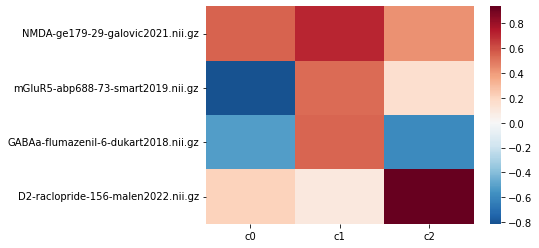

In [ ]:
from sklearn.decomposition import FastICA, PCA

def reduce_dimensions(data, method="pca", n_components=None, min_ev=None, seed=None):
    
    # set n_components to max number if min explained variance is given
    n_components = data.shape[1] if (n_components is None) | (min_ev is not None) else n_components
    lgr.info(f"Performing dimensionality reduction using {method} (max components: {n_components}, min EV: {min_ev}).")
    
    # run PCA
    pcs = PCA(n_components=n_components).fit_transform(data)
    pc_ev = np.var(pcs, axis=0) / np.sum(np.var(data, axis=0))
    
    # find number of components that sum up to total EV of >= min_ev
    if min_ev is not None:
        total_ev = 0
        for i, e in enumerate(pc_ev):
            total_ev += e
            if total_ev>=min_ev:
                n_components = i+1
                lgr.info(f"{n_components} PC(s) explain(s) a total variance of {np.sum(pc_ev[:n_components]):.04f} >= {min_ev} ({pc_ev[:n_components]}).")
                break
        
    ## case pca
    if method=="pca":
        lgr.info(f"Returning {n_components} principal component(s).")
        components = pcs[:,:n_components]
    
    ## case ica
    elif method=="ica":
        lgr.info(f"Returning {n_components} independent component(s).")
        components = FastICA(n_components=n_components, random_state=seed).fit_transform(data) 
        ic_ev = np.var(components, axis=0) / np.sum(np.var(data, axis=0))
        print(ic_ev)
             
    ## return
    return components, pc_ev 


components, pc_ev = reduce_dimensions(data=correlater.X.T, method="ica", n_components=3, min_ev=None, seed=42)
        
# show
display(correlater.X)
data_df = pd.DataFrame(data=components.T, index=[f"c{i}" for i in range(components.shape[1])], columns=correlater.X.columns)   
display(data_df)
print("pcEV:", pc_ev)

# loadings
loadings = np.zeros((correlater.X.shape[0], data_df.shape[0]))
# iterate components
for c in range(loadings.shape[1]):
    loadings[:,c] = corr(correlater.X.values, data_df.iloc[c:c+1,:].values, rank=False, along="rows")[-1,:-1]
loadings = pd.DataFrame(loadings, columns=data_df.index, index=correlater.X.index)
sns.heatmap(loadings, center=0, cmap="RdBu_r")

In [ ]:
loadings

,c0,c1
NMDA-ge179-29-galovic2021.nii.gz,-0.830280,0.229218
mGluR5-abp688-73-smart2019.nii.gz,0.049826,0.915637
GABAa-flumazenil-6-dukart2018.nii.gz,0.540666,0.749257
D2-raclopride-156-malen2022.nii.gz,-0.909518,-0.049300


# Explore parallelization

In [42]:
from multiprocessing import Pool

def fill_array(start_val):
    return range(start_val,start_val+10)

if __name__ == "__main__":
    array_2D = np.zeros((20,10))
    pool = Pool(processes = 4)    
    list_start_vals = range(40,60)

    pool_result = pool.map(fill_array, list_start_vals)

    pool.close()
    pool.join()

    for line,result in enumerate(pool_result):
        array_2D[line,:] = result

    print(array_2D)

Process SpawnPoolWorker-10:
Process SpawnPoolWorker-9:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/llotter/opt/anaconda3/envs/domanalysis/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/llotter/opt/anaconda3/envs/domanalysis/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/llotter/opt/anaconda3/envs/domanalysis/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/llotter/opt/anaconda3/envs/domanalysis/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/llotter/opt/anaconda3/envs/domanalysis/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/llotter/opt/anaconda3/envs/domanalysis/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/llotte

KeyboardInterrupt: 